## Estatística
### Capítulo 5
### Data Science from Scratch

In [1]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,
               14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,
               10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,
               8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,
               5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,
               2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1]

Estatística se refere a técnicas matemáticas nas quais nós entendemos os dados.

As a first approach, you put the friend counts into a histogram using
Counter and plt.bar

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

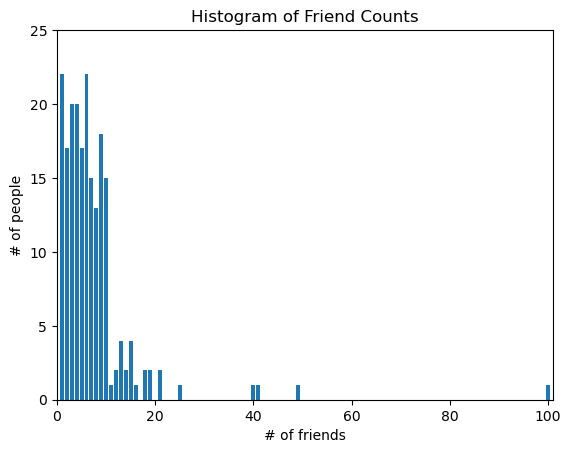

In [3]:
friend_count = Counter(num_friends) # Counter counts the frequency of each value 
xs = range(101) # largest value is 100
ys = [friend_count[x] for x in xs]   # height is # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

How to read better those numbers?

In [5]:
# Probably the simplest statistic is the number of data points
num_points = len(num_friends)
num_points

204

In [7]:
# Maybe the largest and smallest values
largest_value = max(num_friends)
smallest_value = min(num_friends)

print(largest_value)
print(smallest_value)

100.0
1


In [8]:
# or the values in specific position
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

print(smallest_value)
print(second_smallest_value)
print(second_largest_value)

1
1
49


### Central tendencies

Mean, or average, is the sum of the data divided by its count

In [14]:
def mean(xs: list[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

7.333333333333333

Median

Is the middle-most value (if number of data is odd), or the average of two middle-most values (if the number of data is even).

In [15]:
def median_odd(xs: list[float]) -> float:
    """if len(x) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def median_even(xs: list[float]) -> float:
    """if len(x) is even, the median is the average of middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint -1] + sorted_xs[hi_midpoint]) / 2

def median(v: list[float]) -> float:
    """Find the 'middle-most' value of v"""
    return median_even(v) if len(v) % 2 == 0 else median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [16]:
median(num_friends)

6.0

A generalization of the median is the quantile, which represents the value under which a certain percentile of the data lies

In [17]:
def quantile(xs: list[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [18]:
quantile(num_friends, 0.10)

1

In [19]:
quantile(num_friends, 0.30)

4

In [20]:
quantile(num_friends, 0.50)

6

Mode, the most common value(s)

In [24]:
def mode(x: list[float]) -> list[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

assert set(mode(num_friends)) == {1, 6}

In [25]:
mode(num_friends)

[6, 1]

### Dispersion
How spread our data is.

In [30]:
def data_range(xs: list[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

In [31]:
data_range([0, 1, 2, 3, 4, 5])

5

In [32]:
data_range(num_friends)

99.0

Variance

In [40]:
# From linear algebra class

Vector = list[float]

def dot(v: Vector, w: Vector) -> float:
    """Compute v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32 # 1*4 + 2*5 + 3*6

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

# ---

def de_mean(xs: list[float]) -> list[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: list[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2 # variance requires at least two elements

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n-1)

assert 81.54 < variance(num_friends) < 81.55

In [39]:
variance(num_friends)

81.54351395730716

In [41]:
import math

In [45]:
def standard_deviation(xs: list[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

In [46]:
standard_deviation(num_friends)

9.03014473623248

Both the range and the standard deviation have the same outlier problem that we saw earlier for the mean.

An alternative is to compute the difference between 75th and 25th percentile

In [47]:
def interquartile_range(xs: list[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6

In [48]:
interquartile_range([1, 2, 3, 4, 5])

2

In [49]:
interquartile_range(num_friends)

6

### Correlation